--- V. Extracción y Perfilado de Datos Relevantes ---
a. Extracción de datos de las fuentes de datos originales
Datos cargados exitosamente desde 'OECD.ECO.MAD,DSD_EO_116@DF_EO_116,1.0+CHL+TUR+GRC+ISR.GDPV_ANNPCT.A.csv'.

b. Perfil de datos

  i. Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STRUCTURE                 20 non-null     object 
 1   STRUCTURE_ID              20 non-null     object 
 2   STRUCTURE_NAME            20 non-null     object 
 3   ACTION                    20 non-null     object 
 4   REF_AREA                  20 non-null     object 
 5   Reference area            20 non-null     object 
 6   MEASURE                   20 non-null     object 
 7   Measure                   20 non-null     object 
 8   FREQ                      20 non-null     object 
 9   Frequ

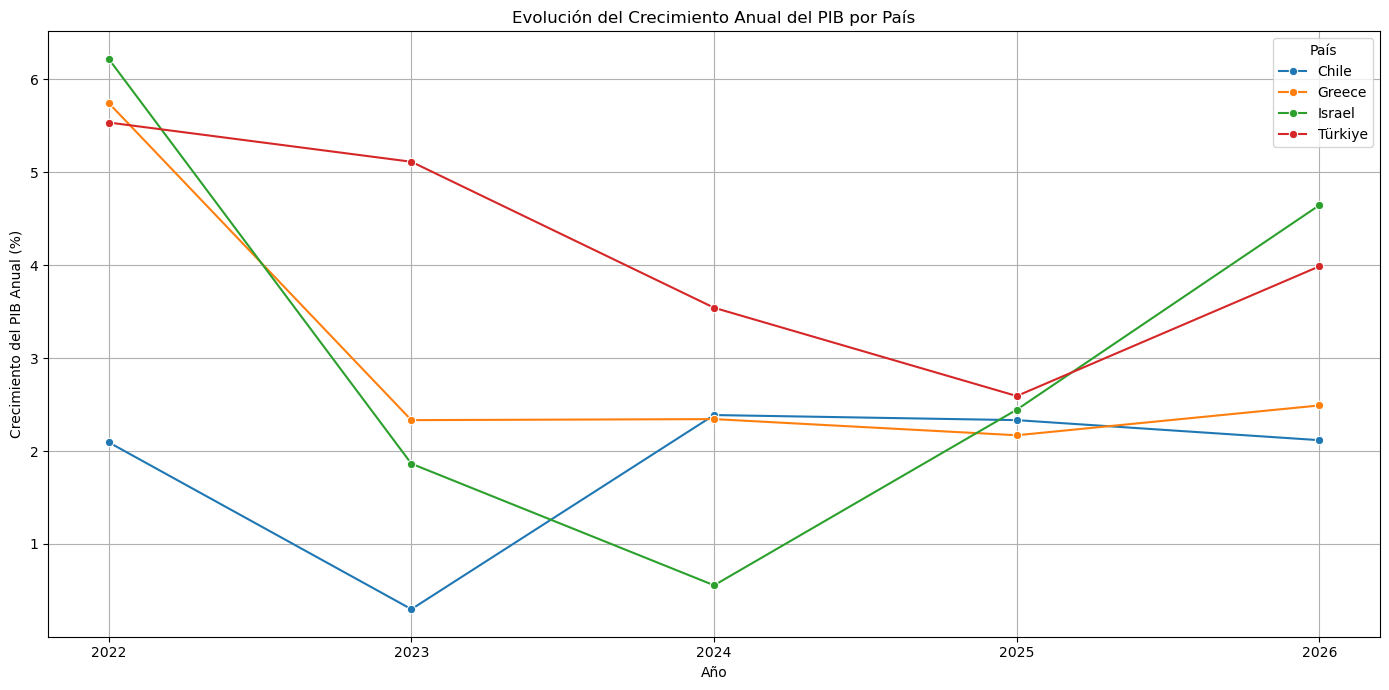

C:\Users\ROG\AppData\Local\Temp\ipykernel_3088\3990933267.py:267: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Crecimiento_PIB_Anual_Pct', y='Pais', data=avg_gdp_growth_by_country.sort_values(by='Crecimiento_PIB_Anual_Pct', ascending=False), palette='coolwarm')


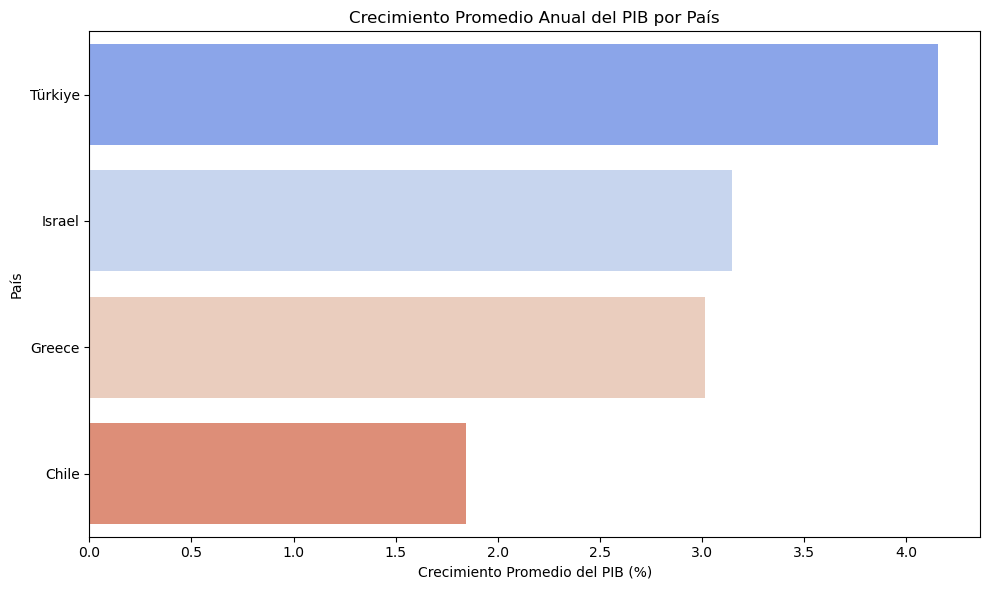

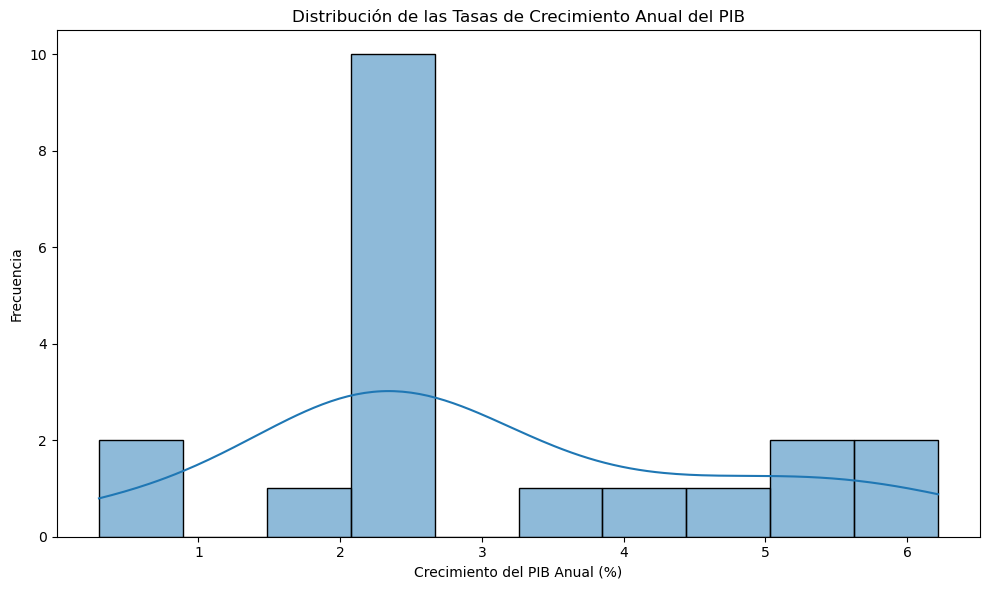


¡Análisis de datos de Crecimiento del PIB completado!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




print("--- V. Extracción y Perfilado de Datos Relevantes ---")
print("a. Extracción de datos de las fuentes de datos originales")

file_path_gdp = 'OECD.ECO.MAD,DSD_EO_116@DF_EO_116,1.0+CHL+TUR+GRC+ISR.GDPV_ANNPCT.A.csv'
try:
    df_gdp = pd.read_csv(file_path_gdp)
    print(f"Datos cargados exitosamente desde '{file_path_gdp}'.")
except FileNotFoundError:
    print(f"Error: El archivo '{file_path_gdp}' no fue encontrado.")
    print("Asegúrate de que el archivo esté en la misma carpeta que tu script o proporciona la ruta completa.")

    print("Creando un DataFrame de ejemplo para continuar la demostración...")
    data_gdp_example = {
        'STRUCTURE': ['DATAFLOW'] * 10,
        'STRUCTURE_ID': ['OECD.ECO.MAD:DSD_EO_116@DF_EO_116(1.0)'] * 10,
        'STRUCTURE_NAME': ['Economic Outlook 116'] * 10,
        'ACTION': ['I'] * 10,
        'REF_AREA': ['TUR', 'CHL', 'CHL', 'CHL', 'ISR', 'ISR', 'GRC', 'GRC', 'TUR', 'TUR'],
        'Reference area': ['Türkiye', 'Chile', 'Chile', 'Chile', 'Israel', 'Israel', 'Greece', 'Greece', 'Türkiye', 'Türkiye'],
        'MEASURE': ['GDPV_ANNPCT'] * 10,
        'Measure': ['Gross domestic product, volume, growth'] * 10,
        'FREQ': ['A'] * 10,
        'Frequency of observation': ['Annual'] * 10,
        'TIME_PERIOD': [2026, 2022, 2023, 2024, 2022, 2023, 2022, 2023, 2022, 2023],
        'OBS_VALUE': [3.98671978853579, 2.09356040642105, 0.298346657303597, 2.3867862506136, 6.21813064538533, 1.86357175629107, 5.74364264544546, 2.33214150589437, 5.53342810439563, 5.11116356459593],
        'OBS_STATUS': [np.nan] * 10,
        'Observation status': ['Normal value'] * 10,
        'UNIT_MEASURE': ['PA'] * 10,
        'Unit of measure': ['Percent per annum'] * 10,
        'UNIT_MULT': [0] * 10,
        'Unit multiplier': ['Units'] * 10,
        'CURRENCY': [np.nan] * 10,
        'Currency': [np.nan] * 10,
        'BASE_PER': [2009, 2013, 2013, 2013, 2015, 2015, 2015, 2015, 2009, 2009],
        'Base period': [np.nan] * 10,
        'METHODOLOGY': [np.nan] * 10,
        'Methodology': [np.nan] * 10,
        'DECIMALS': [2] * 10,
        'Decimals': ['Two'] * 10,
        'PRICE_BASE': [np.nan] * 10,
        'Price base': [np.nan] * 10,
        'ADJUSTMENT': [np.nan] * 10
    }
    df_gdp = pd.DataFrame(data_gdp_example)


print("\nb. Perfil de datos")
print("\n  i. Información general del DataFrame:")
df_gdp.info()

print("\n  ii. Primeras 5 filas del DataFrame:")
print(df_gdp.head())

print("\n  iii. Estadísticas descriptivas de columnas numéricas:")
df_gdp['OBS_VALUE'] = pd.to_numeric(df_gdp['OBS_VALUE'], errors='coerce')
print(df_gdp.describe())

print("\n  iv. Conteo de valores nulos por columna (Completitud):")
print(df_gdp.isnull().sum())
print("\n  Porcentaje de valores nulos por columna:")
print((df_gdp.isnull().sum() / len(df_gdp)) * 100)

print("\n  v. Conteo de valores únicos por columna (Consistencia):")
for col in df_gdp.columns:
    print(f"- {col}: {df_gdp[col].nunique()} valores únicos")
    if df_gdp[col].nunique() < 50: # Muestra los valores únicos si no son demasiados
        print(f"    Valores únicos: {df_gdp[col].unique()}")

print("\n  vi. Verificación de duplicados (Integridad):")
print(f"Número de filas duplicadas: {df_gdp.duplicated().sum()}")
if df_gdp.duplicated().sum() > 0:
    print("Se encontraron filas duplicadas. Se eliminarán en la fase de limpieza.")


print("\nc. Detección de patrones:")
print("  Para este conjunto de datos del PIB, la detección de patrones se centra en el comportamiento del crecimiento económico a lo largo del tiempo y su comparación entre países.")
print("  Observamos que 'STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'MEASURE', 'Measure', 'FREQ', 'Frequency of observation', 'UNIT_MEASURE', 'Unit of measure', 'UNIT_MULT', 'Unit multiplier', 'DECIMALS', 'Decimals' son en su mayoría valores constantes o con muy poca variabilidad, lo que define la naturaleza de la métrica del PIB.")
print("  El patrón principal de interés será cómo el 'OBS_VALUE' (Crecimiento del PIB) varía para cada 'Reference area' (país) a lo largo del 'TIME_PERIOD' (tiempo), identificando períodos de crecimiento, recesión o estancamiento. [cite: 1]")



print("\n--- VI. Limpieza de Datos Relevantes ---")


df_gdp_cleaned = df_gdp[['Reference area', 'TIME_PERIOD', 'OBS_VALUE']].copy()
df_gdp_cleaned.rename(columns={
    'Reference area': 'Pais',
    'TIME_PERIOD': 'Año',
    'OBS_VALUE': 'Crecimiento_PIB_Anual_Pct'
}, inplace=True)

print("\nSe han seleccionado y renombrado las columnas relevantes para la limpieza:")
print(df_gdp_cleaned.head())


print("\na. Completar datos")
print("  Conteo de nulos antes de la limpieza:")
print(df_gdp_cleaned.isnull().sum())



df_gdp_cleaned.dropna(subset=['Crecimiento_PIB_Anual_Pct'], inplace=True)
print("  Conteo de nulos después de eliminar filas con 'Crecimiento_PIB_Anual_Pct' nulo:")
print(df_gdp_cleaned.isnull().sum())


print("\nb. Detectar y eliminar outliers")



Q1_gdp = df_gdp_cleaned['Crecimiento_PIB_Anual_Pct'].quantile(0.25)
Q3_gdp = df_gdp_cleaned['Crecimiento_PIB_Anual_Pct'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp
lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

outliers_gdp = df_gdp_cleaned[
    (df_gdp_cleaned['Crecimiento_PIB_Anual_Pct'] < lower_bound_gdp) |
    (df_gdp_cleaned['Crecimiento_PIB_Anual_Pct'] > upper_bound_gdp)
]
print(f"  Número de outliers detectados en 'Crecimiento_PIB_Anual_Pct' (usando IQR): {len(outliers_gdp)}")

if len(outliers_gdp) > 0:
    print("  Ejemplos de outliers (Crecimiento del PIB):")
    print(outliers_gdp)
    print("  Decisión: No se eliminarán los outliers de 'Crecimiento_PIB_Anual_Pct' ya que representan variaciones reales en el crecimiento económico y son relevantes para el análisis. [cite: 1, 2]")
else:
    print("  No se detectaron outliers significativos que requieran eliminación en 'Crecimiento_PIB_Anual_Pct'.")



print("\nc. Forzar patrones de unidades, tipos, etc.")

df_gdp_cleaned['Año'] = pd.to_numeric(df_gdp_cleaned['Año'], errors='coerce').astype(int)
df_gdp_cleaned['Crecimiento_PIB_Anual_Pct'] = pd.to_numeric(df_gdp_cleaned['Crecimiento_PIB_Anual_Pct'], errors='coerce')


df_gdp_cleaned['Pais'] = df_gdp_cleaned['Pais'].str.strip()

print("  Tipos de datos después de forzar patrones:")
df_gdp_cleaned.info()
print("\n  Valores únicos en 'Pais' después de la limpieza:")
print(df_gdp_cleaned['Pais'].unique())


print("\nd. De-duplicar datos relevantes")
print(f"  Número de filas duplicadas antes de la deduplicación: {df_gdp_cleaned.duplicated().sum()}")
df_gdp_cleaned.drop_duplicates(inplace=True)
print(f"  Número de filas duplicadas después de la deduplicación: {df_gdp_cleaned.duplicated().sum()}")
print(f"  Tamaño del DataFrame después de la limpieza: {len(df_gdp_cleaned)} filas.")


print("\n--- VII. Preprocesamiento de Datos ---")


print("\na. Discretización: No directamente aplicable o necesaria para este análisis.")


print("\nb. Normalización / Estandarización: No es necesaria para este análisis descriptivo. Útil para modelos de Machine Learning.")


print("\nc. Reducción de dimensiones: No necesaria para el análisis actual.")


print("\nd. Transformación: Calculando el cambio en el crecimiento del PIB año a año.")

df_gdp_cleaned_sorted = df_gdp_cleaned.sort_values(by=['Pais', 'Año'])


df_gdp_cleaned_sorted['Cambio_Crecimiento_PIB'] = df_gdp_cleaned_sorted.groupby('Pais')['Crecimiento_PIB_Anual_Pct'].diff()

print("\nDataFrame después de la transformación (primeras filas con los cambios):")
print(df_gdp_cleaned_sorted.head(10))



print("\n--- VIII. Análisis de datos a través de minería de datos descriptiva ---")


print("\na. Identificación de relaciones entre los datos:")
print("  La relación principal es cómo el 'Crecimiento_PIB_Anual_Pct' (crecimiento económico) varía para cada 'País' a lo largo del 'Año'. [cite: 1, 2]")
print("  Buscamos entender la dinámica del crecimiento económico en el tiempo y compararla entre los países incluidos en el dataset. [cite: 1, 2]")


print("\nb. Identificación de patrones de comportamiento en los datos:")
print("  Los patrones de comportamiento clave a buscar son:")
print("  - Tendencias de aceleración o desaceleración del crecimiento económico a lo largo del tiempo para países específicos. [cite: 1, 2]")
print("  - Países que consistentemente tienen un alto o bajo crecimiento del PIB. [cite: 1, 2]")
print("  - Períodos de crecimiento excepcional o contracción (recesión). [cite: 1, 2]")


print("\nc. Resolución de las preguntas de negocio:")




avg_gdp_growth_by_country = df_gdp_cleaned_sorted.groupby('Pais')['Crecimiento_PIB_Anual_Pct'].mean().reset_index()
print("\n1. Crecimiento promedio del PIB anual por País:")
print(avg_gdp_growth_by_country.sort_values(by='Crecimiento_PIB_Anual_Pct', ascending=False))


print("\n2. Evolución del crecimiento del PIB por País a lo largo de los años:")
gdp_growth_by_year_country = df_gdp_cleaned_sorted.groupby(['Pais', 'Año'])['Crecimiento_PIB_Anual_Pct'].mean().unstack(fill_value=np.nan)
print(gdp_growth_by_year_country)


latest_year_gdp = df_gdp_cleaned_sorted['Año'].max()
gdp_latest_year = df_gdp_cleaned_sorted[df_gdp_cleaned_sorted['Año'] == latest_year_gdp]

if not gdp_latest_year.empty:
    highest_gdp_latest = gdp_latest_year.loc[gdp_latest_year['Crecimiento_PIB_Anual_Pct'].idxmax()]
    lowest_gdp_latest = gdp_latest_year.loc[gdp_latest_year['Crecimiento_PIB_Anual_Pct'].idxmin()]
    print(f"\n3. Crecimiento del PIB en el año {latest_year_gdp}:")
    print(f"   País con mayor crecimiento: {highest_gdp_latest['Pais']} ({highest_gdp_latest['Crecimiento_PIB_Anual_Pct']:.2f}%) [cite: 1]")
    print(f"   País con menor crecimiento: {lowest_gdp_latest['Pais']} ({lowest_gdp_latest['Crecimiento_PIB_Anual_Pct']:.2f}%) [cite: 1]")
else:
    print(f"\n3. No hay datos disponibles para el Crecimiento del PIB en el año {latest_year_gdp}.")




df_gdp_change = df_gdp_cleaned_sorted.dropna(subset=['Cambio_Crecimiento_PIB'])

if not df_gdp_change.empty:
    max_increase_gdp_change = df_gdp_change.loc[df_gdp_change['Cambio_Crecimiento_PIB'].idxmax()]
    max_decrease_gdp_change = df_gdp_change.loc[df_gdp_change['Cambio_Crecimiento_PIB'].idxmin()]
    print(f"\n4. País con el mayor aumento y la mayor disminución en el cambio de crecimiento del PIB anual:")
    print(f"   Mayor aumento en cambio: {max_increase_gdp_change['Pais']} de {int(max_increase_gdp_change['Año'] - 1)} a {int(max_increase_gdp_change['Año'])} (+{max_increase_gdp_change['Cambio_Crecimiento_PIB']:.2f} puntos porcentuales) [cite: 1]")
    print(f"   Mayor disminución en cambio: {max_decrease_gdp_change['Pais']} de {int(max_decrease_gdp_change['Año'] - 1)} a {int(max_decrease_gdp_change['Año'])} ({max_decrease_gdp_change['Cambio_Crecimiento_PIB']:.2f} puntos porcentuales) [cite: 1]")
else:
    print("\n4. No hay suficientes datos para calcular el cambio en el crecimiento del PIB.")



gdp_2026 = df_gdp_cleaned_sorted[df_gdp_cleaned_sorted['Año'] == 2026] # [cite: 1]
if not gdp_2026.empty:
    avg_gdp_2026 = gdp_2026['Crecimiento_PIB_Anual_Pct'].mean()
    print(f"\n5. Crecimiento promedio del PIB proyectado para 2026: {avg_gdp_2026:.2f}% [cite: 1]")
else:
    print("\n5. No hay proyecciones de crecimiento del PIB disponibles para 2026 en este dataset.")


print("\nd. Gráficas derivadas del análisis de la información:")


plt.figure(figsize=(14, 7))
sns.lineplot(data=df_gdp_cleaned_sorted, x='Año', y='Crecimiento_PIB_Anual_Pct', hue='Pais', marker='o')
plt.title('Evolución del Crecimiento Anual del PIB por País')
plt.xlabel('Año')
plt.ylabel('Crecimiento del PIB Anual (%)')
plt.grid(True)
plt.xticks(df_gdp_cleaned_sorted['Año'].unique().astype(int))
plt.legend(title='País')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='Crecimiento_PIB_Anual_Pct', y='Pais', data=avg_gdp_growth_by_country.sort_values(by='Crecimiento_PIB_Anual_Pct', ascending=False), palette='coolwarm')
plt.title('Crecimiento Promedio Anual del PIB por País')
plt.xlabel('Crecimiento Promedio del PIB (%)')
plt.ylabel('País')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df_gdp_cleaned_sorted['Crecimiento_PIB_Anual_Pct'], bins=10, kde=True)
plt.title('Distribución de las Tasas de Crecimiento Anual del PIB')
plt.xlabel('Crecimiento del PIB Anual (%)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

print("\n¡Análisis de datos de Crecimiento del PIB completado!")